In [31]:
import pandas as pd
from datetime import datetime as dt

In [36]:
files = ['/media/admlab/422CAF902CAF7E13/Hannes/Yellow_Cab_Datasets/yellow_tripdata_2018-01.csv',
        '/media/admlab/422CAF902CAF7E13/Hannes/Yellow_Cab_Datasets/yellow_tripdata_2018-02.csv',
        '/media/admlab/422CAF902CAF7E13/Hannes/Yellow_Cab_Datasets/yellow_tripdata_2018-03.csv',
        '/media/admlab/422CAF902CAF7E13/Hannes/Yellow_Cab_Datasets/yellow_tripdata_2018-04.csv',
        '/media/admlab/422CAF902CAF7E13/Hannes/Yellow_Cab_Datasets/yellow_tripdata_2018-05.csv',
        '/media/admlab/422CAF902CAF7E13/Hannes/Yellow_Cab_Datasets/yellow_tripdata_2018-06.csv']

In [100]:
borough_trips = pd.DataFrame()
month = 1 
data2 = pd.read_csv("/media/sf_Lab/taxi _zone_lookup.csv")
date_format = '%Y-%m-%d  %H:%M:%S'

for file in files:
    data = pd.read_csv(file, usecols = ['tpep_pickup_datetime', 'PULocationID', 'DOLocationID'])
    borough = data.join(data2.set_index('LocationID'), on='PULocationID')
    if month == 1:
        borough_trips = borough['Borough'].value_counts() 
        borough_trips = borough_trips.to_frame(name = "Total Trips")
        borough_trips['Absolute trips ' + str(month)] = borough['Borough'].value_counts() 
        #count the trips in every borough and convert from series to dataframe
        borough['tpep_pickup_datetime'] = pd.to_datetime(borough['tpep_pickup_datetime'])
        #convert pickup time to datetime format
        month_days = borough['tpep_pickup_datetime'].dt.daysinmonth
        month_days = month_days.to_frame(name = "Days_of_the_Month").tail(1).Days_of_the_Month.item()
        borough_trips['Average trips in month ' + str(month)] = borough['Borough'].value_counts() / month_days
        #divide borough_count with datetime (get days of a month according to a year from datetime) to get the average trips per day
        
        borough_trips.loc['Total', 'Absolute trips ' + str(month)]= borough_trips['Absolute trips ' + str(month)].sum()
        #sum for trips in all buroughs
        borough_trips.loc['Total', 'Average trips in month ' + str(month)]= borough.shape[0] / month_days
        #average for all trips in the month

    else: 
        borough_trips['Absolute trips ' + str(month)] = borough['Borough'].value_counts()
        borough_trips['Total Trips'] = borough_trips['Total Trips'] + borough['Borough'].value_counts() 
        #count the trips in every borough and convert from series to dataframe
        borough['tpep_pickup_datetime'] = pd.to_datetime(borough['tpep_pickup_datetime'])
        #convert pickup time to datetime format
        month_days = borough['tpep_pickup_datetime'].dt.daysinmonth
        month_days = month_days.to_frame(name = "Days_of_the_Month").tail(1).Days_of_the_Month.item()
        borough_trips['Average trips in month ' + str(month)] = borough['Borough'].value_counts() / month_days
        #divide borough_count with datetime (get days of a month according to a year from datetime) to get the average trips per day
        
        borough_trips.loc['Total', 'Absolute trips ' + str(month)]= borough_trips['Absolute trips ' + str(month)].sum()
        #sum for trips in all buroughs
        borough_trips.loc['Total', 'Average trips in month ' + str(month)]= borough.shape[0] / month_days
    month = month + 1 #not working reading files from disk
borough_trips.loc['Total', 'Total Trips']= borough_trips['Total Trips'].sum()


In [101]:
borough_trips

,Total Trips,Absolute trips 1,Average trips in month 1,Absolute trips 2,Average trips in month 2,Absolute trips 3,Average trips in month 3,Absolute trips 4,Average trips in month 4,Absolute trips 5,Average trips in month 5,Absolute trips 6,Average trips in month 6
Manhattan,48959840.0,7965703.0,256958.161290,7767881.0,277424.321429,8568668.0,276408.645161,8428796.0,280959.866667,8349983.0,269354.290323,7878809.0,262626.966667
Queens,3358182.0,526906.0,16996.967742,484521.0,17304.321429,564853.0,18221.064516,596324.0,19877.466667,610831.0,19704.225806,574747.0,19158.233333
Unknown,864099.0,158911.0,5126.161290,137402.0,4907.214286,162790.0,5251.290323,150056.0,5001.866667,128669.0,4150.612903,126271.0,4209.033333
Brooklyn,683135.0,100250.0,3233.870968,95101.0,3396.464286,122937.0,3965.709677,119074.0,3969.133333,122812.0,3961.677419,122961.0,4098.700000
Bronx,55810.0,7389.0,238.354839,6566.0,234.500000,10330.0,333.225806,10438.0,347.933333,10873.0,350.741935,10214.0,340.466667
EWR,3854.0,571.0,18.419355,497.0,17.750000,659.0,21.258065,698.0,23.266667,751.0,24.225806,678.0,22.600000
Staten Island,815.0,144.0,4.645161,108.0,3.857143,139.0,4.483871,129.0,4.300000,144.0,4.645161,151.0,5.033333
Total,53925735.0,8759874.0,282576.580645,8492076.0,303288.428571,9430376.0,304205.677419,9305515.0,310183.833333,9224063.0,297550.419355,8713831.0,290461.033333


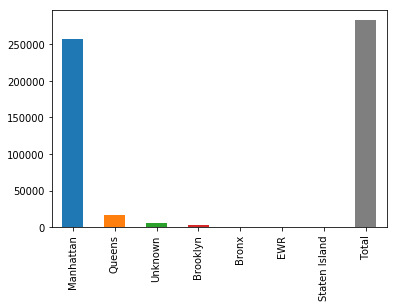

In [107]:
borough_trips['Average trips in month 1'].plot.bar()

In [99]:
borough_trips

,Total Trips,Absolute trips 1,Average trips in month 1,Absolute trips 2,Average trips in month 2,Absolute trips 3,Average trips in month 3,Absolute trips 4,Average trips in month 4,Absolute trips 5,Average trips in month 5,Absolute trips 6,Average trips in month 6
Manhattan,1085247.0,175944.0,5675.612903,183810.0,6564.642857,182899.0,5899.967742,179576.0,5985.866667,181006.0,5838.903226,182012.0,6067.066667
Queens,75836.0,13932.0,449.419355,10462.0,373.642857,11856.0,382.451613,13472.0,449.066667,13575.0,437.903226,12539.0,417.966667
Unknown,20343.0,4854.0,156.580645,3637.0,129.892857,3060.0,98.709677,3231.0,107.700000,3062.0,98.774194,2499.0,83.300000
Brooklyn,16593.0,4781.0,154.225806,1903.0,67.964286,1960.0,63.225806,3283.0,109.433333,2050.0,66.129032,2616.0,87.200000
Bronx,1846.0,450.0,14.516129,172.0,6.142857,211.0,6.806452,412.0,13.733333,291.0,9.387097,310.0,10.333333
EWR,122.0,36.0,1.161290,14.0,0.500000,13.0,0.419355,23.0,0.766667,15.0,0.483871,21.0,0.700000
Staten Island,13.0,3.0,0.096774,2.0,0.071429,1.0,0.032258,3.0,0.100000,1.0,0.032258,3.0,0.100000
Total,1200000.0,200000.0,6451.612903,200000.0,7142.857143,200000.0,6451.612903,200000.0,6666.666667,200000.0,6451.612903,200000.0,6666.666667
